<a href="https://colab.research.google.com/github/EWataaru/Hypothesis-testing/blob/main/Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Electric car usage

## i. Defining the Question

### Specifying the Data Analytic Question

Is there a difference between the number of bluecars taken on weekends and on weekdays 


### Understanding the context 

We aim to understand electric car usage for the Autolib electric car-sharing service company to investigate a claim that the number of blue cars taken on weekends and on weekdays are the same from the provided Autolib dataset.



### Recording the Experimental Design

We will identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim

## ii. Reading the Data

In [1]:
# Loading the Data from the source

# Dataset url = https://bit.ly/DSCoreAutolibDataset

# Variable Definitions:
# Postal code - postal code of the area (in Paris)
# date - date of the row aggregation
# n_daily_data_points - number of daily data poinst that were available for aggregation, that day
# dayOfWeek - identifier of weekday (0: Monday -> 6: Sunday)
# day_type - weekday or weekend
# BlueCars_taken_sum - Number of bluecars taken that date in that area
# BlueCars_returned_sum - Number of bluecars returned that date in that area
# Utilib_taken_sum - Number of Utilib taken that date in that area
# Utilib_returned_sum - Number of Utilib returned that date in that area
# Utilib_14_taken_sum - Number of Utilib 1.4 taken that date in that area
# Utilib_14_returned_sum - Number of Utilib 1.4 returned that date in that area
# Slots_freed_sum - Number of recharging slots released that date in that area
# Slots_taken_sum - Number of rechargign slots taken that date in that area


In [2]:
# Importing Libraries

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as stats

%matplotlib inline


In [3]:
# Loading dataset

ecar = pd.read_csv('https://bit.ly/DSCoreAutolibDataset')


In [4]:
# Determining the no. of records in our dataset
ecar.shape

(16085, 13)

In [5]:
# Previewing the top of our dataset
ecar.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [6]:
# Previewing the bottom of our dataset
ecar.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [7]:
# Checking whether each column has an appropriate datatype
ecar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


## iii. Tidying the Dataset

### Identifying and dealing with missing data

In [8]:
# Checking for missing values in the dataset
ecar.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

### Checking for and dealing with outliers

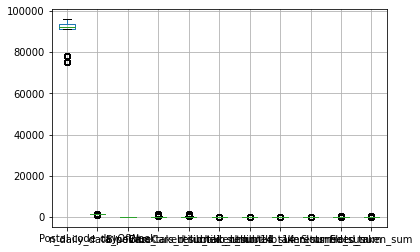

In [9]:
ecar.boxplot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


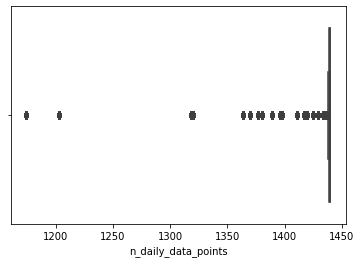

In [10]:
sns.boxplot(ecar.n_daily_data_points)


In [11]:
# DEALING WITH THE OUTLIERS

# IQR Score 
# Anything not in the range of 
# (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier


# Indicating the 1st and 3rd quantiles and the IQR

Q1 = ecar.quantile(0.25)
Q3 = ecar.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'ecar1'

ecar1 = ecar[~((ecar < (Q1 - 1.5 * IQR)) | (ecar > (Q3 + 1.5 * IQR))).any(axis=1)]

# Dataset after removing the outliers

print(ecar1.shape)

# Dataset with outliers

print(ecar.shape)

(9783, 13)
(16085, 13)


In [12]:
ecar1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9783 entries, 3899 to 16083
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             9783 non-null   int64 
 1   date                    9783 non-null   object
 2   n_daily_data_points     9783 non-null   int64 
 3   dayOfWeek               9783 non-null   int64 
 4   day_type                9783 non-null   object
 5   BlueCars_taken_sum      9783 non-null   int64 
 6   BlueCars_returned_sum   9783 non-null   int64 
 7   Utilib_taken_sum        9783 non-null   int64 
 8   Utilib_returned_sum     9783 non-null   int64 
 9   Utilib_14_taken_sum     9783 non-null   int64 
 10  Utilib_14_returned_sum  9783 non-null   int64 
 11  Slots_freed_sum         9783 non-null   int64 
 12  Slots_taken_sum         9783 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 1.0+ MB


In [13]:
# Rename columns to have standard column names
col_names = ecar1.columns.tolist()
for col in range(len(col_names)):
  col_names[col] = col_names[col].lower().replace(" ", "_")

ecar1.columns = col_names
ecar1.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

### Checking for Anomalies

In [14]:
print(ecar1['postal_code'].value_counts())#relevant
print(ecar1['date'].value_counts())
print(ecar1['n_daily_data_points'].value_counts())
print(ecar1['dayofweek'].value_counts())#relevant
print(ecar1['day_type'].value_counts())#relevant
print(ecar1['bluecars_taken_sum'].value_counts())#relevant
print(ecar1['bluecars_returned_sum'].value_counts())#relevant
print(ecar1['utilib_taken_sum'].value_counts())
print(ecar1['utilib_returned_sum'].value_counts())
print(ecar1['utilib_14_taken_sum'].value_counts())
print(ecar1['utilib_14_returned_sum'].value_counts())
print(ecar1['slots_freed_sum'].value_counts())
print(ecar1['slots_taken_sum'].value_counts())


94130    130
92160    130
91400    130
94450    130
94410    130
        ... 
93260    101
92800     82
93390     72
92130     65
92100      4
Name: postal_code, Length: 79, dtype: int64
4/27/2018    78
5/20/2018    78
5/3/2018     78
6/4/2018     78
1/2/2018     78
             ..
3/11/2018    72
6/15/2018    72
4/21/2018    72
3/10/2018    72
4/14/2018    71
Name: date, Length: 130, dtype: int64
1440    7364
1439    1888
1438     531
Name: n_daily_data_points, dtype: int64
6    1564
0    1525
1    1520
5    1399
2    1359
4    1283
3    1133
Name: dayofweek, dtype: int64
weekday    6820
weekend    2963
Name: day_type, dtype: int64
12     190
9      189
14     189
11     189
13     180
      ... 
267      1
275      1
291      1
216      1
287      1
Name: bluecars_taken_sum, Length: 275, dtype: int64
13     198
17     190
12     189
11     182
14     176
      ... 
249      1
209      1
193      1
198      1
295      1
Name: bluecars_returned_sum, Length: 269, dtype: int64
0     4044

In [15]:
# Dropping the irrelevant columns i.e. date , n_daily_data_points , dayofweek , utilib_taken_sum , utilib_returned_sum , utilib_14_taken_sum , utilib_14_returned_sum , slots_freed_sum , slots_taken_sum
# Those values were dropped since axis was set equal to 1 and 
# Changes are made in the ecarl1 data frame since inplace was True.
ecar1.drop(["date", "n_daily_data_points", "utilib_taken_sum","utilib_returned_sum", "utilib_14_taken_sum","utilib_14_returned_sum", "slots_freed_sum","slots_taken_sum"], axis = 1, inplace = True) 


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
ecar1.head()

,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
3899,91330,0,weekday,19,9
3900,91330,1,weekday,10,10
3901,91330,2,weekday,11,13
3903,91330,4,weekday,10,6
3905,91330,6,weekend,28,17


## iv. Exploratory Analysis

###Sampling

In [17]:
ecar1['day_type'].value_counts()

weekday    6820
weekend    2963
Name: day_type, dtype: int64

In [18]:
# Stratified sample
ecar1_strat = ecar1.groupby('day_type', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.05))

# proportion of the stratified sample
print(ecar1_strat['day_type'].value_counts())

# Check the stratified output
print(ecar1_strat)

weekday    341
weekend    148
Name: day_type, dtype: int64
       postal_code  dayofweek  ... bluecars_taken_sum  bluecars_returned_sum
5872         92190          1  ...                 49                     53
13425        94110          0  ...                 30                     37
13671        94130          0  ...                 28                     31
5790         92190          0  ...                 40                     57
7094         92270          3  ...                 25                     25
...            ...        ...  ...                ...                    ...
14946        94410          6  ...                 37                     33
4217         91400          6  ...                  9                      9
10927        93230          6  ...                 17                     13
14844        94410          6  ...                 28                     34
6376         92220          6  ...                 76                     80

[489 rows x 5 co

###Univariate analysis

In [19]:
# Showing the descriptive statistics for the numerical measures in the whole dataset
#
ecar1.describe()

,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
count,9783.000000,9783.000000,9783.000000,9783.000000
mean,93104.755188,2.979454,49.242870,49.222324
std,1012.235885,2.074932,46.303795,46.223838
min,91330.000000,0.000000,0.000000,0.000000
25%,92270.000000,1.000000,17.000000,17.000000
50%,93110.000000,3.000000,34.000000,34.000000
75%,94100.000000,5.000000,67.000000,67.000000
max,95880.000000,6.000000,293.000000,301.000000


In [20]:
# Showing the descriptive statistics for the numerical measures in the sample
#
ecar1_strat.describe()

,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
count,489.000000,489.000000,489.000000,489.000000
mean,93027.443763,2.965235,48.883436,48.838446
std,953.200503,2.068702,50.731299,51.022219
min,91330.000000,0.000000,0.000000,0.000000
25%,92260.000000,1.000000,15.000000,15.000000
50%,92600.000000,3.000000,33.000000,31.000000
75%,93800.000000,5.000000,68.000000,66.000000
max,95880.000000,6.000000,293.000000,295.000000


92160    13
94700    13
92340    13
92260    12
92410    10
         ..
92150     2
93400     2
95880     2
93600     2
94450     1
Name: postal_code, Length: 78, dtype: int64


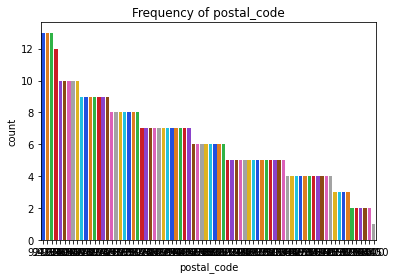

In [21]:
print(ecar1_strat.postal_code.value_counts())
ecar1_strat.postal_code.value_counts().index
sns.countplot(x= 'postal_code', data=ecar1_strat, order=ecar1_strat.postal_code.value_counts().index,
palette='bright',lw=3)
plt.title("Frequency of postal_code" )
plt.show()

weekday    341
weekend    148
Name: day_type, dtype: int64


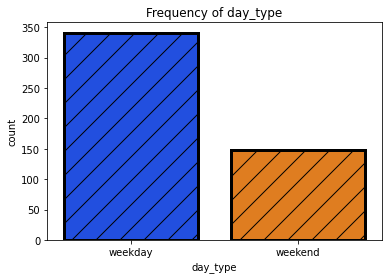

In [22]:
print(ecar1_strat.day_type.value_counts())
ecar1_strat.day_type.value_counts().index
sns.countplot(x= 'day_type', data=ecar1_strat, order=ecar1_strat.day_type.value_counts().index,
palette='bright',ec='black',hatch='/',lw=3)
plt.title("Frequency of day_type" )
plt.show()

11     19
17     15
21     12
19     11
10     11
       ..
115     1
69      1
119     1
123     1
293     1
Name: bluecars_taken_sum, Length: 143, dtype: int64


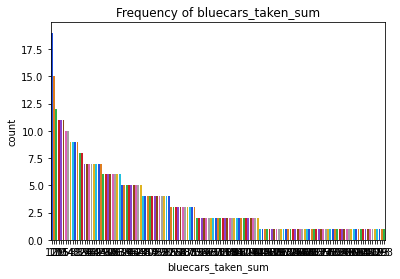

In [23]:
print(ecar1_strat.bluecars_taken_sum.value_counts())
ecar1_strat.bluecars_taken_sum.value_counts().index
sns.countplot(x= 'bluecars_taken_sum', data=ecar1_strat, order=ecar1_strat.bluecars_taken_sum.value_counts().index,
palette='bright')
plt.title("Frequency of bluecars_taken_sum" )
plt.show()

1    82
6    76
0    74
5    72
2    63
3    62
4    60
Name: dayofweek, dtype: int64


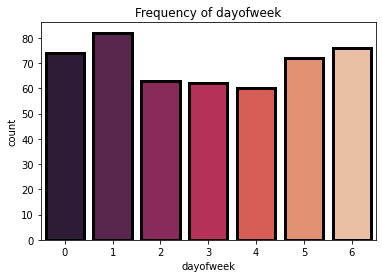

In [24]:
print(ecar1_strat.dayofweek.value_counts())
sns.countplot(x= 'dayofweek', data=ecar1_strat,palette='rocket',ec='black',lw=3)
plt.title("Frequency of dayofweek" )
plt.show()

###Bivariate analysis

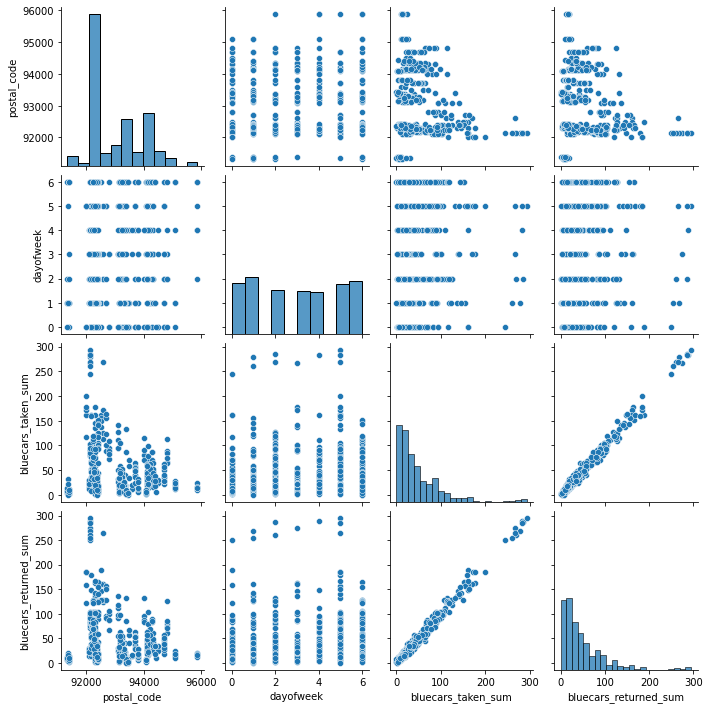

In [25]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(ecar1_strat)
plt.show()

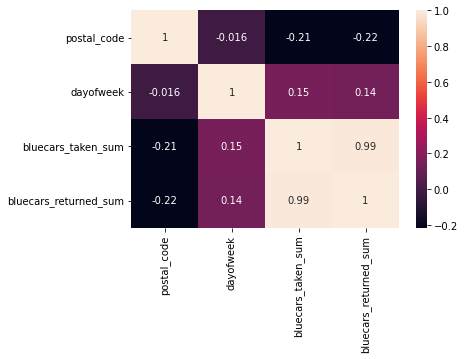

In [26]:
sns.heatmap(ecar1_strat.corr(),annot=True)
plt.show()

In [27]:
#Calculating Correlation coefficient of the numerical measures

coeff = ecar1_strat["bluecars_taken_sum"].corr(ecar1_strat["bluecars_returned_sum"]) 
print(coeff)

0.9936303288760598


## v. Hypothesis Testing

### Define the null and alternative hypothesis

$H_{0}: \mu_{weekday} - \mu_{weekend} = 0$

$H_{A}: \mu_{weekday} - \mu_{weekend} \neq 0$

In [35]:
weekday_bluein = ecar1_strat.loc[(ecar1_strat.day_type == "weekday")] #weekday
weekday_bluein.describe()


,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
count,341.000000,341.000000,341.000000,341.000000
mean,93070.205279,1.859238,43.117302,43.246334
std,940.115897,1.407170,48.392796,48.153899
min,91330.000000,0.000000,0.000000,0.000000
25%,92270.000000,1.000000,13.000000,14.000000
50%,93100.000000,2.000000,26.000000,27.000000
75%,94000.000000,3.000000,55.000000,54.000000
max,95880.000000,4.000000,286.000000,288.000000


In [36]:
weekend_bluein = ecar1_strat.loc[(ecar1_strat.day_type == "weekend")] #weekend
weekend_bluein.describe()

,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
count,148.000000,148.000000,148.000000,148.000000
mean,92928.918919,5.513514,62.168919,61.722973
std,978.803334,0.501515,53.595536,55.129387
min,91330.000000,5.000000,0.000000,0.000000
25%,92240.000000,5.000000,24.000000,19.000000
50%,92400.000000,6.000000,49.500000,49.000000
75%,93440.000000,6.000000,87.000000,88.250000
max,95880.000000,6.000000,293.000000,295.000000


### Testing for normality

In [40]:
stats.shapiro(weekday_bluein['bluecars_taken_sum'])

(0.7254914045333862, 2.5897393172921193e-23)

In [41]:
stats.shapiro(weekend_bluein['bluecars_taken_sum'])

(0.8511945605278015, 6.21471554773656e-11)

p value is less than 0.05. 

We reject the null hypothesis that the data is normally distributed

--------------------

### Hypothesis test

   We use a non-parametric test.


In [44]:
stats.mannwhitneyu(weekday_bluein['bluecars_taken_sum'],weekend_bluein['bluecars_taken_sum'])

MannwhitneyuResult(statistic=18337.0, pvalue=7.749342998277661e-07)

p value < 0.05. We reject the null hypothesis

There is a difference in the total number of bluecars taken on weekends and on weekdays